In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ds=pd.read_csv('/content/BITCOIN.csv')

In [ ]:
print(ds)



            date     open     high      low    Close        volume  \
0     28-04-2013   135.30   135.98   132.10   134.21  0.000000e+00   
1     29-04-2013   134.44   147.49   134.00   144.54  0.000000e+00   
2     30-04-2013   144.00   146.93   134.05   139.00  0.000000e+00   
3     01-05-2013   139.00   139.89   107.72   116.99  0.000000e+00   
4     02-05-2013   116.38   125.60    92.28   105.21  0.000000e+00   
...          ...      ...      ...      ...      ...           ...   
2037  25-11-2018  3880.78  4120.87  3585.06  4009.97  6.825640e+09   
2038  26-11-2018  4015.07  4107.14  3643.92  3779.13  6.476900e+09   
2039  27-11-2018  3765.95  3862.96  3661.01  3820.72  5.998720e+09   
2040  28-11-2018  3822.47  4385.90  3822.47  4257.42  7.280280e+09   
2041  29-11-2018  4269.00  4413.02  4145.77  4278.85  6.503348e+09   

            market  close_ratio  spread  
0     1.488567e+09       0.5438    3.88  
1     1.603769e+09       0.7813   13.49  
2     1.542813e+09       0.3843  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ds.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
ds[numerical_cols] = scaler.fit_transform(ds[numerical_cols])
print(ds)


            date      open      high       low     Close    volume    market  \
0     28-04-2013  0.003442  0.003069  0.003521  0.003386  0.000000  0.002177   
1     29-04-2013  0.003398  0.003644  0.003621  0.003917  0.000000  0.002530   
2     30-04-2013  0.003890  0.003616  0.003624  0.003632  0.000000  0.002343   
3     01-05-2013  0.003633  0.003264  0.002231  0.002499  0.000000  0.001596   
4     02-05-2013  0.002467  0.002550  0.001415  0.001893  0.000000  0.001196   
...          ...       ...       ...       ...       ...       ...       ...   
2037  25-11-2018  0.196435  0.202170  0.186134  0.202869  0.286300  0.211423   
2038  26-11-2018  0.203355  0.201484  0.189247  0.190988  0.271672  0.199131   
2039  27-11-2018  0.190519  0.189283  0.190151  0.193129  0.251615  0.201368   
2040  28-11-2018  0.193431  0.215411  0.198690  0.215605  0.305369  0.224676   
2041  29-11-2018  0.216439  0.216766  0.215788  0.216708  0.272781  0.225836   

      close_ratio    spread  
0        

In [ ]:

def SMA(data, window):
    return data['Close'].rolling(window=window).mean()

def EMA(data, window):
    return data['Close'].ewm(span=window, adjust=False).mean()

ds['SMA_20'] = SMA(ds, 20)
ds['EMA_20'] = EMA(ds, 20)

ds[['Close', 'SMA_20', 'EMA_20']].head()


,Close,SMA_20,EMA_20
0,0.003386,NaN,0.003386
1,0.003917,NaN,0.003436
2,0.003632,NaN,0.003455
3,0.002499,NaN,0.003364
4,0.001893,NaN,0.003224


In [ ]:

def RSI(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


ds['RSI_14'] = RSI(ds, 14)

ds[['Close', 'RSI_14']].head()


,Close,RSI_14
0,0.003386,NaN
1,0.003917,NaN
2,0.003632,NaN
3,0.002499,NaN
4,0.001893,NaN


In [ ]:

def EMA(data, window):
    return data['Close'].ewm(span=window, adjust=False).mean()

def MACD(data, short_window, long_window, signal_window):
    short_EMA = EMA(data, short_window)
    long_EMA = EMA(data, long_window)
    MACD_line = short_EMA - long_EMA
    signal_line = MACD_line.ewm(span=signal_window, adjust=False).mean()
    histogram = MACD_line - signal_line
    return MACD_line, signal_line, histogram

ds['MACD_line'], ds['Signal_line'], ds['Histogram'] = MACD(ds, 12, 26, 9)

print(ds[['Close', 'MACD_line', 'Signal_line', 'Histogram']].head())


      Close  MACD_line  Signal_line  Histogram
0  0.003386   0.000000     0.000000   0.000000
1  0.003917   0.000042     0.000008   0.000034
2  0.003632   0.000052     0.000017   0.000035
3  0.002499  -0.000031     0.000008  -0.000038
4  0.001893  -0.000144    -0.000023  -0.000121


In [ ]:

invalid_dates = ds[ds['date'].isna()]
print(invalid_dates[['date']])


Empty DataFrame
Columns: [date]
Index: []


(2042, 15)
         date     Close  MACD_line  Signal_line  Histogram
0  28-04-2013  0.003386   0.000000     0.000000   0.000000
1  29-04-2013  0.003917   0.000042     0.000008   0.000034
2  30-04-2013  0.003632   0.000052     0.000017   0.000035
3  01-05-2013  0.002499  -0.000031     0.000008  -0.000038
4  02-05-2013  0.001893  -0.000144    -0.000023  -0.000121


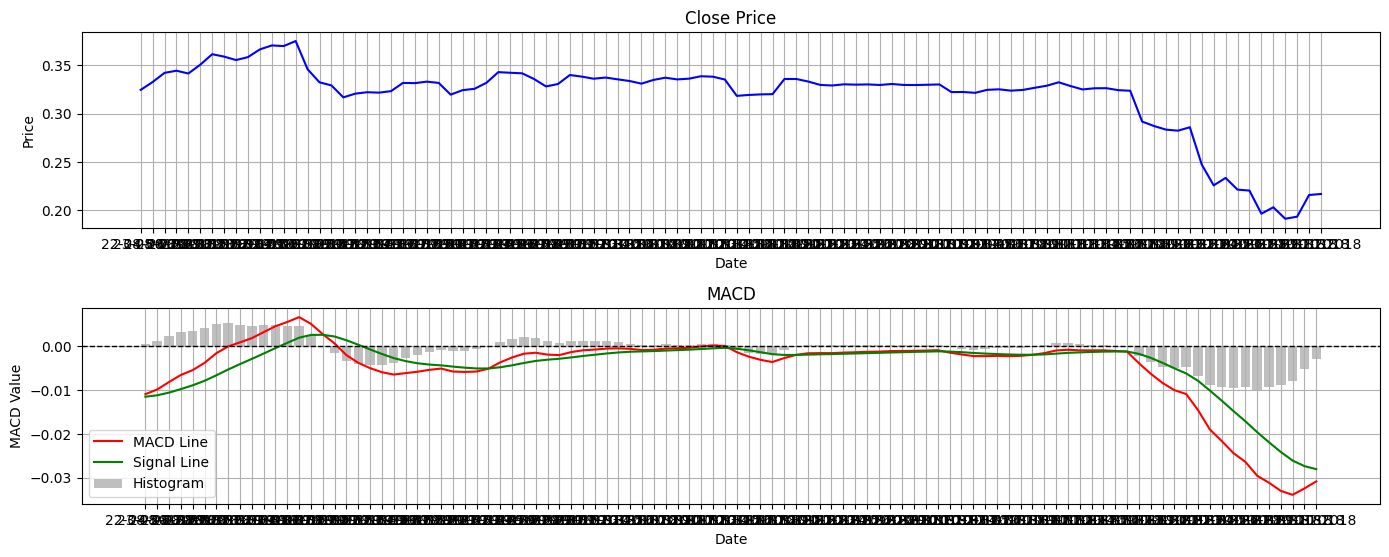

date            0
open            0
high            0
low             0
Close           0
volume          0
market          0
close_ratio     0
spread          0
SMA_20         19
EMA_20          0
RSI_14         13
MACD_line       0
Signal_line     0
Histogram       0
dtype: int64


In [ ]:


print(ds.shape)
print(ds[['date', 'Close', 'MACD_line', 'Signal_line', 'Histogram']].head())
ds_sample = ds.tail(100)  
plt.figure(figsize=(14, 8))


plt.subplot(3, 1, 1)
plt.plot(ds_sample['date'], ds_sample['Close'], label='Close Price', color='blue')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(ds_sample['date'], ds_sample['MACD_line'], label='MACD Line', color='red')
plt.plot(ds_sample['date'], ds_sample['Signal_line'], label='Signal Line', color='green')
plt.bar(ds_sample['date'], ds_sample['Histogram'], label='Histogram', color='gray', alpha=0.5)
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.axhline(0, color='black', lw=1, ls='--')
plt.legend()
plt.grid()


plt.tight_layout()

plt.show()
print(ds.isna().sum())
%matplotlib inline


<ipython-input-15-6acc3c5d7b55>:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds['date'] = pd.to_datetime(ds['date'])


Mean Squared Error: 0.00 
Mean Absolute  Error: 48.26824928924546
R-squared: 0.9990383904448056


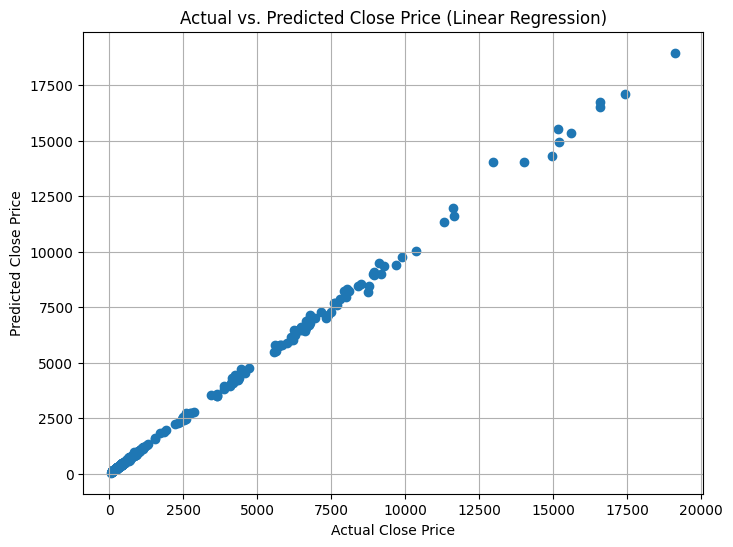

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score ,classification_report

ds = pd.read_csv('/content/BITCOIN.csv')


ds['date'] = pd.to_datetime(ds['date'])


def SMA(data, window):
    return data['Close'].rolling(window=window).mean()

def EMA(data, window):
    return data['Close'].ewm(span=window, adjust=False).mean()

def RSI(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def MACD(data, short_window, long_window, signal_window):
    short_EMA = EMA(data, short_window)
    long_EMA = EMA(data, long_window)
    MACD_line = short_EMA - long_EMA
    signal_line = MACD_line.ewm(span=signal_window, adjust=False).mean()
    histogram = MACD_line - signal_line
    return MACD_line, signal_line, histogram


ds['SMA_20'] = SMA(ds, 20)
ds['EMA_20'] = EMA(ds, 20)
ds['RSI_14'] = RSI(ds, 14)
ds['MACD_line'], ds['Signal_line'], ds['Histogram'] = MACD(ds, 12, 26, 9)

# Prepare the data for linear regression
X = ds[['SMA_20', 'EMA_20', 'RSI_14', 'MACD_line', 'Signal_line', 'Histogram']].dropna()  
y = ds['Close'][X.index]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse= f"{mse / 1_00_00_000:.2f} "


print("Mean Squared Error:", mse)
print("Mean Absolute  Error:", mae)
print("R-squared:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (Linear Regression)")
plt.grid()
plt.show()


Random Forest Regression Results:
Mean Squared Error: 0.01 
Mean Asolute Error: 48.26824928924546
R-squared: 0.9953171042596116


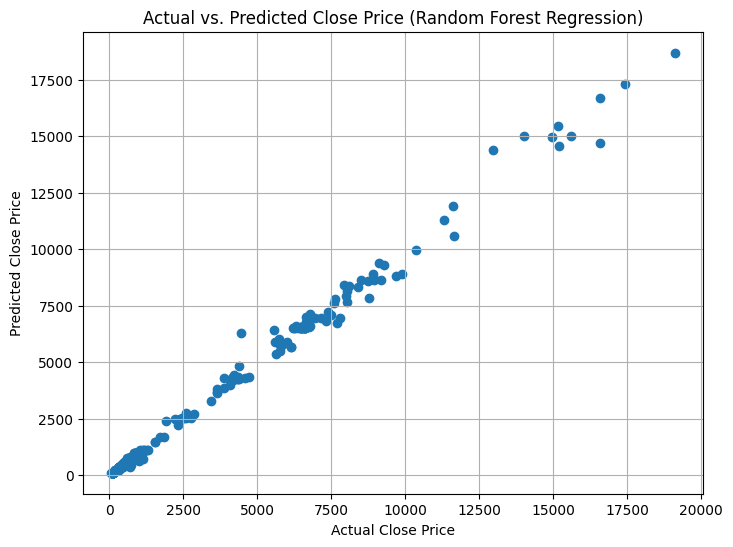

In [ ]:

from sklearn.ensemble import RandomForestRegressor

X = ds[['SMA_20', 'EMA_20', 'RSI_14', 'MACD_line', 'Signal_line', 'Histogram']].dropna()
y = ds['Close'][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=42, n_jobs=-1)


rf_model.fit(X_train, y_train)


rf_y_pred = rf_model.predict(X_test)


rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mse = f"{rf_mse / 1_00_00_000:.2f} "

print("Random Forest Regression Results:")
print("Mean Squared Error:", rf_mse)
print("Mean Asolute Error:", rf_mae)
print("R-squared:", rf_r2)



plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (Random Forest Regression)")
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.629e+12, tolerance: 1.253e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Results:
Mean Squared Error: 1.01 
Mean Absolute Error: 61.12830341513525
R-squared: 0.947464198229457


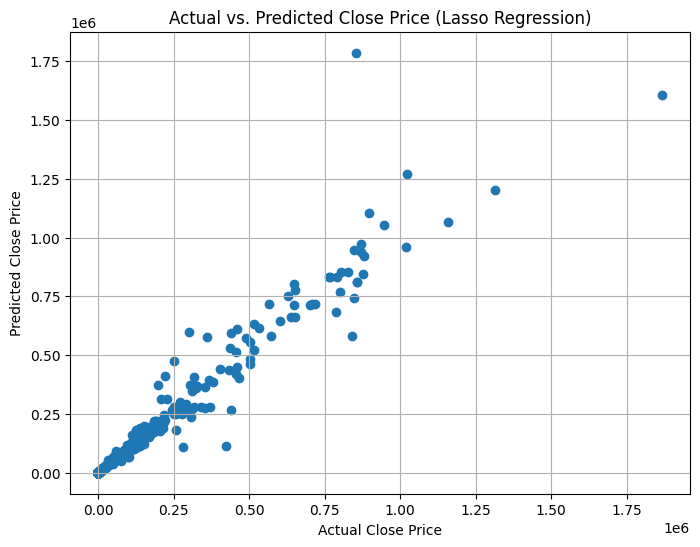

In [ ]:


from sklearn.linear_model import Lasso



X = ds[['SMA_20', 'EMA_20', 'RSI_14', 'MACD_line', 'Signal_line', 'Histogram']].dropna()
y = ds['close'][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lasso_model = Lasso(alpha=0.1) 


lasso_model.fit(X_train, y_train)


lasso_y_pred = lasso_model.predict(X_test)


lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

lasso_mse = f"{lasso_mse / 1_00_00_000:.2f} "

print("Lasso Regression Results:")
print("Mean Squared Error:", lasso_mse)
print("Mean Absolute Error:", lasso_mae)
print("R-squared:", lasso_r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (Lasso Regression)")
plt.grid()
plt.show()

Training model...
Making predictions...
Gradient Boosting Regression Results:
Mean Squared Error: 0.60 
Mean Absolute Error: 56.09954223298723
R-squared: 0.9691448109789775


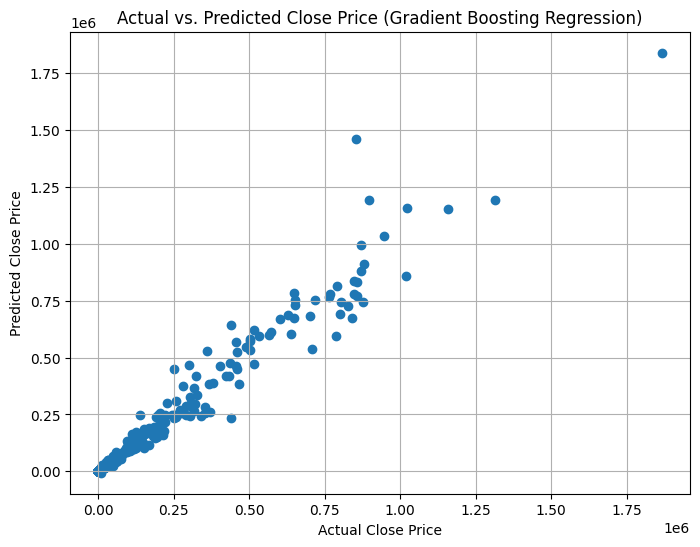

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score


ds = pd.read_csv('/content/BITCOIN.csv') 


ds['date'] = pd.to_datetime(ds['date'])




def SMA(data, window):
    return data['close'].rolling(window=window).mean()

def EMA(data, window):
    return data['close'].ewm(span=window, adjust=False).mean()

def RSI(data, window):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def MACD(data, short_window, long_window, signal_window):
    short_EMA = EMA(data, short_window)
    long_EMA = EMA(data, long_window)
    MACD_line = short_EMA - long_EMA
    signal_line = MACD_line.ewm(span=signal_window, adjust=False).mean()
    histogram = MACD_line - signal_line
    return MACD_line, signal_line, histogram

ds['SMA_20'] = SMA(ds, 20)
ds['EMA_20'] = EMA(ds, 20)
ds['RSI_14'] = RSI(ds, 14)
ds['MACD_line'], ds['Signal_line'], ds['Histogram'] = MACD(ds, 12, 26, 9)


X = ds[['SMA_20', 'EMA_20', 'RSI_14', 'MACD_line', 'Signal_line', 'Histogram']].dropna()  
y = ds['close'][X.index]  




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


print("Training model...")
gb_model.fit(X_train, y_train)

print("Making predictions...")
gb_y_pred = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

gb_mse = f"{gb_mse / 1_00_00_000:.2f} "

print("Gradient Boosting Regression Results:")
print("Mean Squared Error:", gb_mse)
print("Mean Absolute Error:", gb_mae)
print("R-squared:", gb_r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (Gradient Boosting Regression)")
plt.grid()
plt.show()


In [ ]:


def predict_for_user_input(model):
  """Gets user input for test values and predicts using the provided model."""

  sma_20 = float(input("Enter SMA_20: "))
  ema_20 = float(input("Enter EMA_20: "))
  rsi_14 = float(input("Enter RSI_14: "))
  macd_line = float(input("Enter MACD_line: "))
  signal_line = float(input("Enter Signal_line: "))
  histogram = float(input("Enter Histogram: "))

  user_input_df = pd.DataFrame({
      'SMA_20': [sma_20],
      'EMA_20': [ema_20],
      'RSI_14': [rsi_14],
      'MACD_line': [macd_line],
      'Signal_line': [signal_line],
      'Histogram': [histogram]
  })


  predicted_close_price = model.predict(user_input_df)[0]

  print("\nPredicted Close Price:", predicted_close_price)


predict_for_user_input(model)


Enter SMA_20: 20
Enter EMA_20: 32
Enter RSI_14: 25
Enter MACD_line: 30
Enter Signal_line: 5
Enter Histogram: 4

Predicted Close Price: 90.82595848459269


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def predict_price_from_date(date_str, model, ds):
    """Predicts the price for a given date using the trained model."""
    try:

        input_date = pd.to_datetime(date_str)


        ds = ds[~ds.index.duplicated(keep='first')]

        if not isinstance(ds.index, pd.DatetimeIndex):
            ds.index = pd.to_datetime(ds.index)  

        if input_date not in ds.index:
  
            nearest_indexer = ds.index.get_indexer([input_date], method='nearest')

            if nearest_indexer[0] == -1:
                return "No close date found in dataset for prediction."


            closest_date = ds.index[nearest_indexer[0]]
        else:
            closest_date = input_date


        input_features = ds.loc[[closest_date]][['SMA_20', 'EMA_20', 'RSI_14', 'MACD_line', 'Signal_line', 'Histogram']]


        predicted_price = model.predict(input_features)[0]
        return predicted_price

    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD format."
    except KeyError:
        return "Date not found in dataset."


date_to_predict = input("Enter the date (YYYY-MM-DD) for prediction: ")
predicted_price = predict_price_from_date(date_to_predict, model, ds)

print(f"Predicted price for {date_to_predict}: {predicted_price}")

Enter the date (YYYY-MM-DD) for prediction: 2018-11-29


NameError: name 'model' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+07, tolerance: 1.918e+06
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Results:
Mean Squared Error: 0.00 
Mean Absolute Error: 48.375221482839166
R-squared: 0.9990884250593043


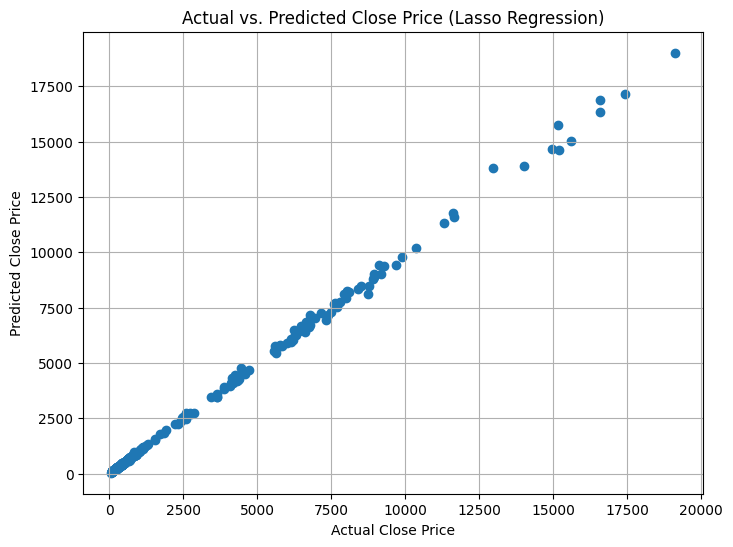

In [ ]:

from sklearn.linear_model import LinearRegression, Lasso

lasso_model = Lasso(alpha=0.1) 


lasso_model.fit(X_train, y_train)

lasso_y_pred = lasso_model.predict(X_test)


lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_mse = f"{lasso_mse / 1_00_00_000:.2f} "

print("Lasso Regression Results:")
print("Mean Squared Error:", lasso_mse)
print("Mean Absolute Error:", lasso_mae)
print("R-squared:", lasso_r2)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (Lasso Regression)")
plt.grid()
plt.show()

KNN Regression Results:
Mean Squared Error: 0.00 
Mean Absolute Error: 74.38827654320991
R-squared: 0.9967396285990625


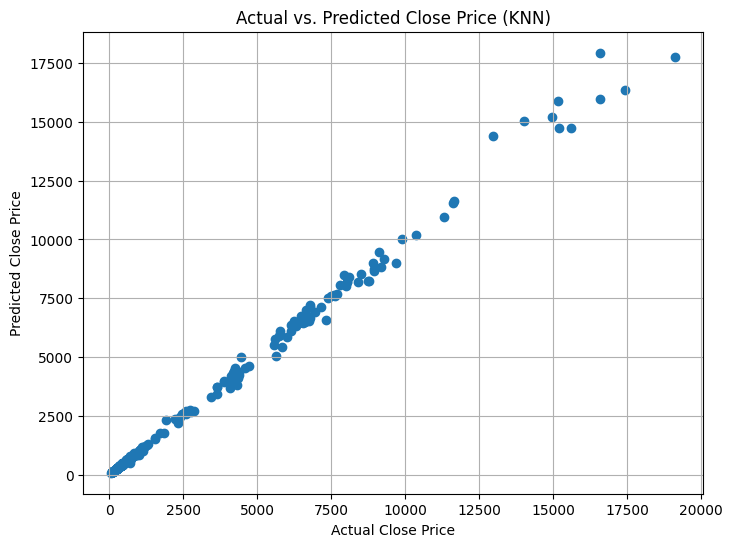

In [ ]:



from sklearn.neighbors import KNeighborsRegressor


X = ds[['SMA_20', 'EMA_20', 'RSI_14', 'MACD_line', 'Signal_line', 'Histogram']].dropna()
y = ds['Close'][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)


knn_y_pred = knn_model.predict(X_test)


knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

knn_mse= f"{knn_mse / 1_00_00_000:.2f} "

print("KNN Regression Results:")
print("Mean Squared Error:", knn_mse)
print("Mean Absolute Error:", knn_mae)
print("R-squared:", knn_r2)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (KNN)")
plt.grid(True)
plt.show()

In [ ]:

import pandas as pd

data = {
    'Model': ['Linear Regression', 'Random Forest', 'Lasso Regression', 'Gradient Boosting', 'SVR', 'KNN'],
    'MSE': [mse, rf_mse, lasso_mse, gb_mse, svr_mse, knn_mse],
    'MAE': [mae, rf_mae, lasso_mae, gb_mae, svr_mae, knn_mae],
    'R-squared': [r2, rf_r2, lasso_r2, gb_r2, svr_r2, knn_r2]
}

df = pd.DataFrame(data)
df

In [ ]:


from sklearn.svm import SVR

X = ds[['SMA_20', 'EMA_20', 'RSI_14', 'MACD_line', 'Signal_line', 'Histogram']].dropna()
y = ds['close'][X.index]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(X_train, y_train)


svr_y_pred = svr_model.predict(X_test)


svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print("SVR Regression Results:")
print("Mean Squared Error:", svr_mse)
print("Mean Absolute Error:", svr_mae)
print("R-squared:", svr_r2)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (SVR)")
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor


def evaluate_models(filename):
    try:
        
        ds = pd.read_csv(filename)
        ds['date'] = pd.to_datetime(ds['date'], dayfirst=True, errors='coerce')


        ds = ds.dropna(subset=['date'])


        ds['SMA_20'] = SMA(ds, 20)
        ds['EMA_20'] = EMA(ds, 20)
        ds['RSI_14'] = RSI(ds, 14)
        ds['MACD_line'], ds['Signal_line'], ds['Histogram'] = MACD(ds, 12, 26, 9)


        X = ds[['SMA_20', 'EMA_20', 'RSI_14', 'MACD_line', 'Signal_line', 'Histogram']].dropna()
        y = ds['Close'][X.index]  
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(n_estimators=20, max_depth=5, random_state=42, n_jobs=-1),
            'Lasso Regression': Lasso(alpha=0.1),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
            'KNN': KNeighborsRegressor(n_neighbors=5),
            'SRV': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1) 
        }

        results = []
        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            mse= f"{mse / 1_00_00_000:.12f} "


            mae_pct = round(mae * 100, 2)
            r2_pct = round(r2 * 100, 2)

            results.append([filename, name, mse, mae_pct, r2_pct])

        return results
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except Exception as e:
        print(f"An error occurred while processing '{filename}': {e}")
        return None


def SMA(df, window):
    return df['Close'].rolling(window=window).mean()  

def EMA(df, window):
    return df['Close'].ewm(span=window, adjust=False).mean()  

def RSI(df, window):
    delta = df['Close'].diff(1)  # Updated to 'Close'
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def MACD(df, span_short, span_long, span_signal):
    short_ema = df['Close'].ewm(span=span_short, adjust=False).mean()  
    long_ema = df['Close'].ewm(span=span_long, adjust=False).mean()  
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=span_signal, adjust=False).mean()
    histogram = macd_line - signal_line
    return macd_line, signal_line, histogram


filenames = ['/content/BITCOIN.csv','/content/AAVE.csv', '/content/BNB-USD.csv', '/content/DOGE-USD.csv', '/content/ETH-USD.csv']  # Replace with your filenames


all_results = []
for filename in filenames:
    results = evaluate_models(filename)
    if results:
        all_results.extend(results)


df_results = pd.DataFrame(all_results, columns=['File', 'Model', 'MSE (%)', 'MAE (%)', 'R-squared (%)'])


for filename in filenames:
    print(f"\nResults for {filename}:")
    filtered_results = df_results[df_results['File'] == filename]
    print(filtered_results[['Model', 'MSE (%)', 'MAE (%)', 'R-squared (%)']].to_string(index=False))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+07, tolerance: 1.918e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.994e+04, tolerance: 4.874e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.169e+04, tolerance: 4.767e


Results for /content/BITCOIN.csv:
            Model         MSE (%)   MAE (%)  R-squared (%)
Linear Regression 0.001153591234    4826.82          99.90
    Random Forest 0.005617818007   10297.03          99.53
 Lasso Regression 0.001093567399    4837.52          99.91
Gradient Boosting 0.002383903503    7132.47          99.80
              KNN 0.003911292111    7438.83          99.67
              SRV 1.499395640007  196837.83         -24.99

Results for /content/AAVE.csv:
            Model         MSE (%)  MAE (%)  R-squared (%)
Linear Regression 0.000027756053   1232.81          98.94
    Random Forest 0.000083597406   1868.00          96.82
 Lasso Regression 0.000027115207   1214.54          98.97
Gradient Boosting 0.000049274777   1502.52          98.13
              KNN 0.000056947083   1522.88          97.83
              SRV 0.002121536183  12133.89          19.31

Results for /content/BNB-USD.csv:
            Model         MSE (%)  MAE (%)  R-squared (%)
Linear Regression 0.0

In [ ]:
pip install graphviz matplotlib

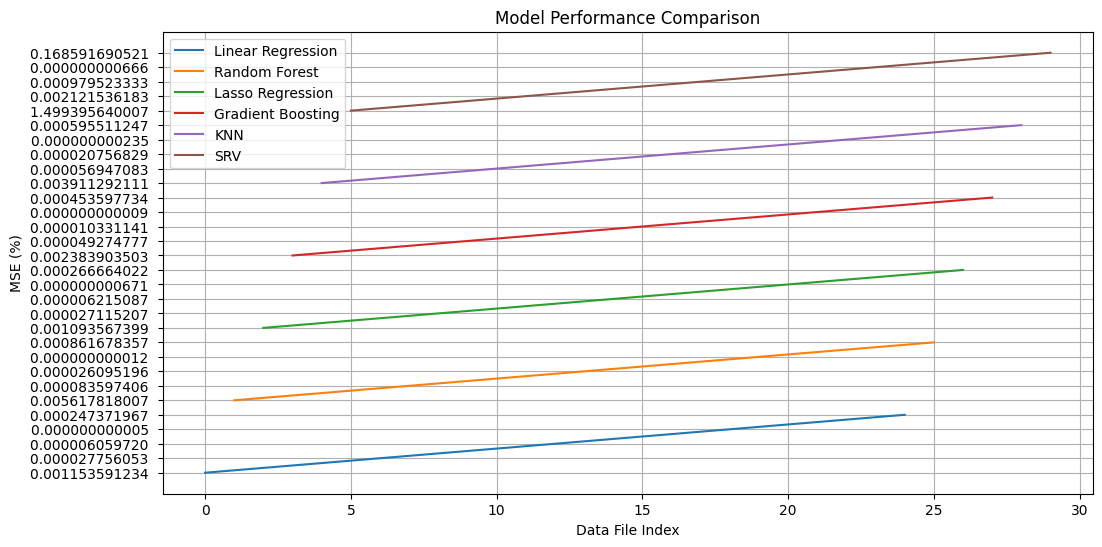

In [ ]:


model = gb_model 
predict_for_user_input(model)

date_to_predict = input("Enter the date (YYYY-MM-DD) for prediction: ")
predicted_price = predict_price_from_date(date_to_predict, model, ds)

print(f"Predicted price for {date_to_predict}: {predicted_price}")

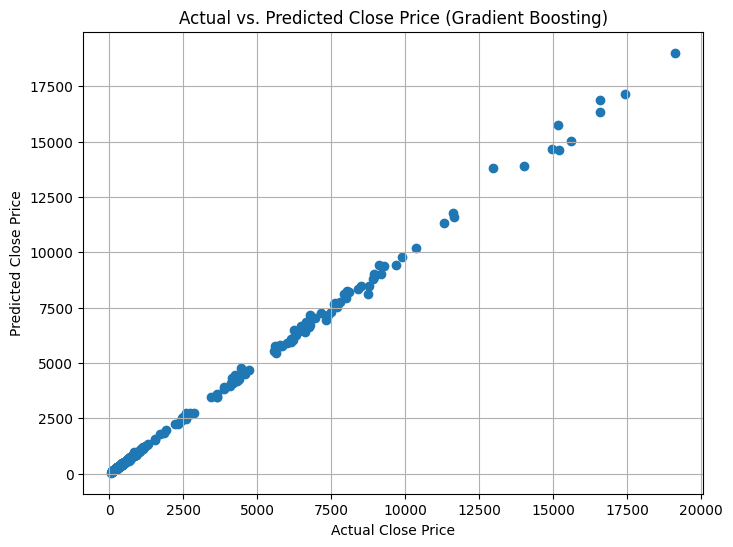

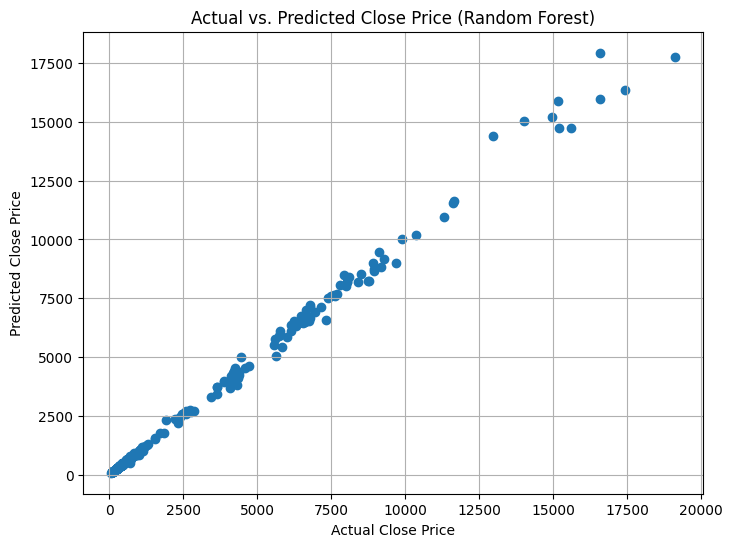

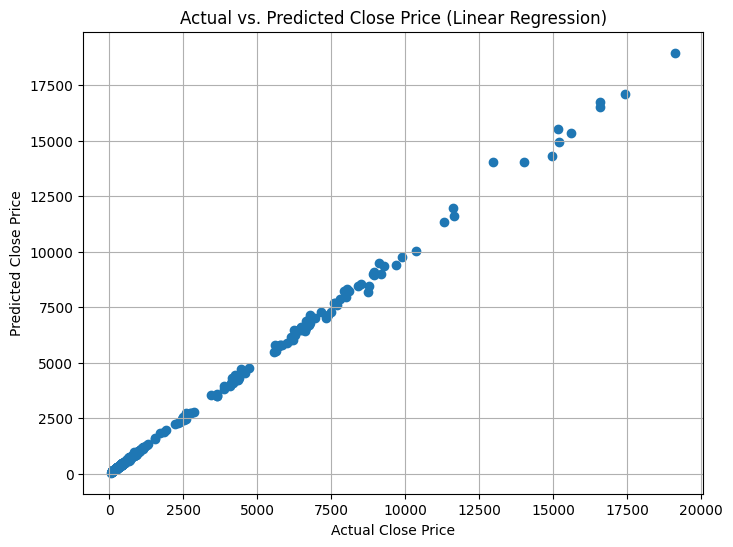

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_y_pred) 
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (Gradient Boosting)")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_y_pred)  
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (Random Forest)")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)  
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (Linear Regression)")
plt.grid(True)
plt.show()



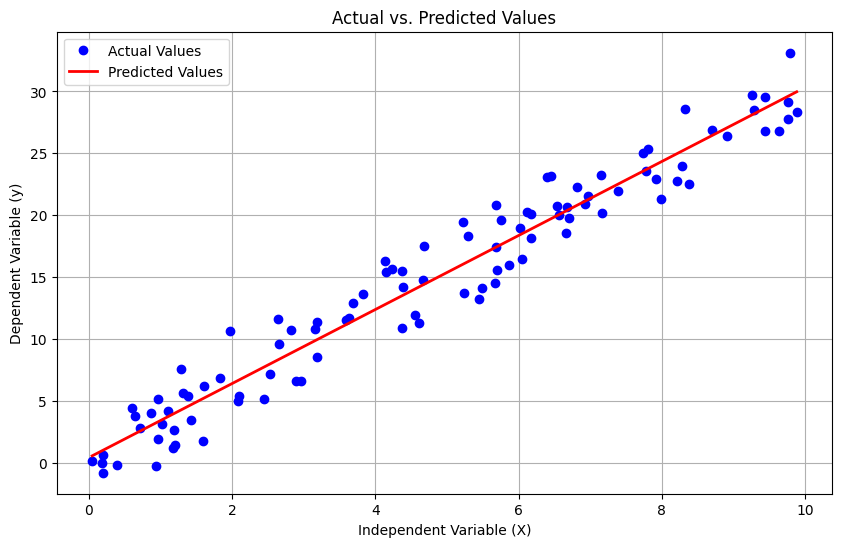

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


np.random.seed(0)
X = np.random.rand(100, 1) * 10  
y = 3 * X.squeeze() + np.random.randn(100) * 2  

model = LinearRegression()
model.fit(X, y)


predictions = model.predict(X)

sort_index = np.argsort(X.flatten())
X_sorted = X[sort_index]
predictions_sorted = predictions[sort_index]
y_sorted = y[sort_index]


plt.figure(figsize=(10, 6))
plt.plot(X_sorted, y_sorted, label='Actual Values', color='blue', marker='o', linestyle='None')
plt.plot(X_sorted, predictions_sorted, label='Predicted Values', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.grid()
plt.show()


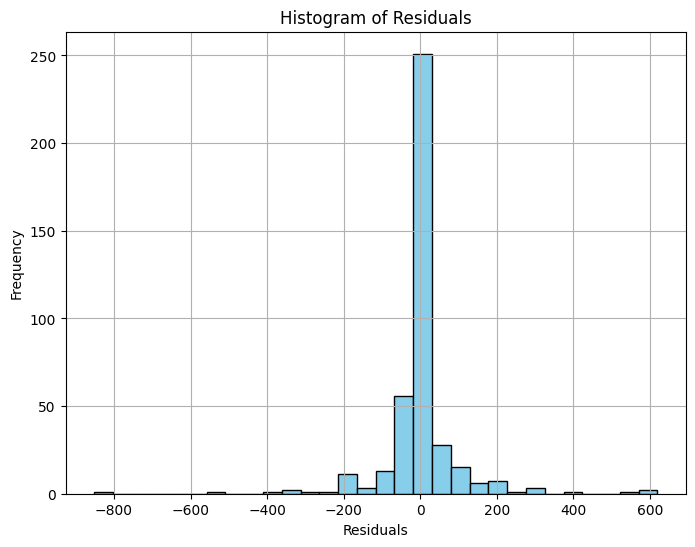

In [ ]:


import matplotlib.pyplot as plt


residuals = y_test - lasso_y_pred  

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()